<a href="https://colab.research.google.com/github/TarelkinaAnastasia/Project/blob/main/Final_financial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests

In [ ]:
data1 = pd.read_csv("/content/data1.csv")
data2 = pd.read_csv("/content/data2.csv")
data3 = pd.read_csv("/content/data3.csv")
data4 = pd.read_csv("/content/data4.csv")
data5 = pd.read_csv("/content/data5.csv")
data6 = pd.read_csv("/content/data6.csv")
data7 = pd.read_csv("/content/data7.csv")
data8 = pd.read_csv("/content/data8.csv")
data9 = pd.read_csv("/content/data9.csv")
data10 = pd.read_csv("/content/data10.csv")


In [ ]:
data1 = data1.drop('Unnamed: 0', axis = 1)
data2 = data2.drop('Unnamed: 0', axis = 1)
data3 = data3.drop('Unnamed: 0', axis = 1)
data4 = data4.drop('Unnamed: 0', axis = 1)
data5 = data5.drop('Unnamed: 0', axis = 1)
data6 = data6.drop('Unnamed: 0', axis = 1)
data7 = data7.drop('Unnamed: 0', axis = 1)
data8 = data8.drop('Unnamed: 0', axis = 1)
data9 = data9.drop('Unnamed: 0', axis = 1)
data10 = data10.drop('Unnamed: 0', axis = 1)


In [ ]:
data = pd.concat([data1, data3,data2,data4,data5,data6,data7,data8,data9,data10], ignore_index = True)

In [ ]:
data.head()

,NCAV,Name,P/E,Ticker,currentPrice,earnings,floatShares,marketCap,revenue,sector,totalCurrentAssets,totalDebt
0,2.999204,Agilent Technologies Inc,32.25987596694215,A,130.5500,1210000000,298079080.0,3.903445e+10,6319000000,Healthcare,3.799000e+09,2.905000e+09
1,17.457624,Alcoa Inc,27.731841491841493,AA,64.5000,429000000,183530132.0,1.189696e+10,12152000000,Basic Materials,5.026000e+09,1.822000e+09
2,NaN,Asia Automotive Acquisition Corp,NaN,AAACU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Asia Broadband Inc,NaN,AABB,0.0744,NaN,NaN,3.062654e+07,NaN,Basic Materials,NaN,8.708090e+05
4,NaN,Access Anytime Bancorp Inc,NaN,AABC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna()

In [ ]:
data.reset_index(inplace = True)

In [ ]:

data = data.drop(["index"], axis = "columns")

NSAV - коэф Грэма

P/E - соотношение цена и прибыль

float shares - количество эмитированных акций в свободной продаже

market cap - капитализация

revenue - выручка

total current assets - совокупная стоимость активов

earnings - прибыль

total debt - общая задолженность





In [ ]:
data["P/E"][23]

'-16.42465774706618'

In [ ]:
data["P/E"] = pd.to_numeric(data["P/E"], errors = 'coerce')

In [ ]:
#ration - соотношение
data["ration"] = list(data["currentPrice"]*100/(data["NCAV"]))

In [ ]:

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

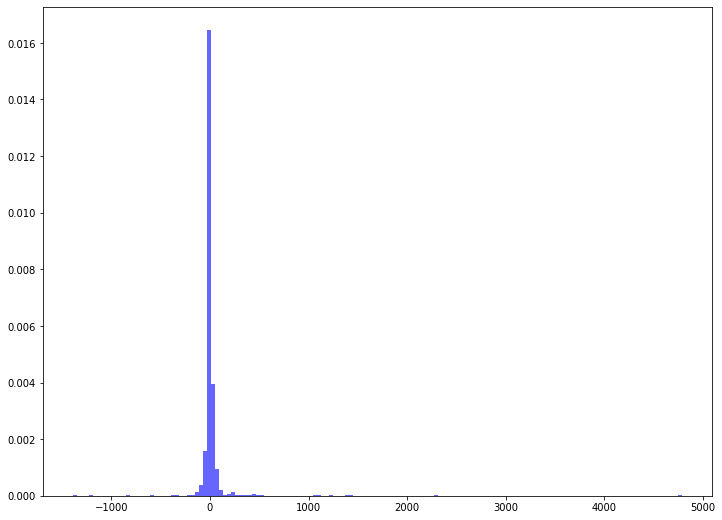

In [ ]:

# ncav_without_outliers = data[pd.DataFrame([data['NCAV'] >= -150, data['NCAV'] <= 150]).all()]['NCAV']
# mu, std = norm.fit(data['NCAV']) 
  
plt.figure(figsize=(12, 9))
# рисуем гистограмму
plt.hist(data['NCAV'], bins=150, density=True, alpha=0.6, color='b')
  
# # рисуем теоретическую функцию плотности нормального распределения с подобранными параметрами
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
  
# plt.plot(x, p, 'k', linewidth=2)
# title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
# plt.title(title)
  
plt.show()

In [ ]:
#количество компаний - соотношение

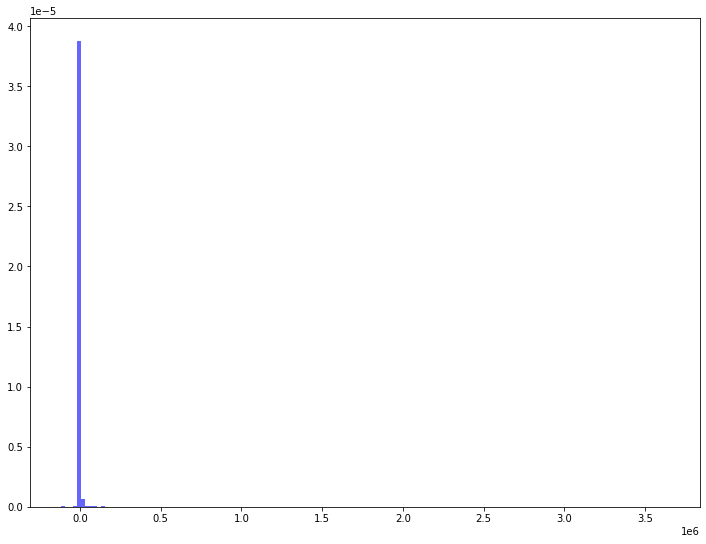

In [ ]:
plt.figure(figsize=(12, 9))
# рисуем гистограмму
_ = plt.hist(data['ration'], bins=150, density=True, alpha=0.6, color='b')

In [ ]:
data.loc[data["ration"] < 60, 'cluster'] = 'heavily_underrated'
data.loc[pd.DataFrame([data["ration"] >= 60, data["ration"] <= 75]).all(), 'cluster'] = 'underrated'
data.loc[data["ration"] > 75, 'cluster'] = 'overrated'

In [ ]:
data.head()

,NCAV,Name,P/E,Ticker,currentPrice,earnings,floatShares,marketCap,revenue,sector,totalCurrentAssets,totalDebt,ration,cluster
0,2.999204,Agilent Technologies Inc,32.259876,A,130.55,1210000000,298079080.0,3.903445e+10,6319000000,Healthcare,3.799000e+09,2.905000e+09,4352.821153,overrated
1,17.457624,Alcoa Inc,27.731841,AA,64.50,429000000,183530132.0,1.189696e+10,12152000000,Basic Materials,5.026000e+09,1.822000e+09,369.466090,overrated
2,-44.288297,American Airlines Group Inc,-5.908533,AAL,18.13,-1993000000,644097894.0,1.177571e+10,29882000000,Industrials,1.733600e+10,4.586200e+10,-40.936323,heavily_underrated
3,6.718847,Atlantic American Corp,13.154388,AAME,2.76,4281000,4344942.0,5.631394e+07,199554000,Financial Services,6.712800e+07,3.793500e+07,41.078477,heavily_underrated
4,18.440591,Aarons Inc,5.259944,AAN,18.83,109934000,30204563.0,5.782467e+08,1845504000,Consumer Cyclical,8.749740e+08,3.179840e+08,102.111693,overrated


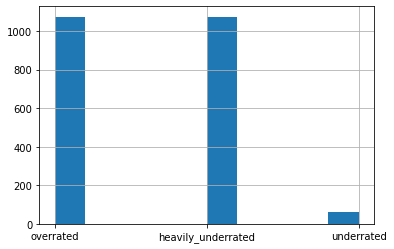

In [ ]:
data['cluster'].hist()

Количество тикеров в группировке по секторам и кластерам

In [ ]:
data.groupby(['sector', 'cluster']).aggregate({'Name' : 'count'})

Name
sector                 cluster                 
Basic Materials        heavily_underrated    45
                       overrated             57
                       underrated             1
Communication Services heavily_underrated    42
                       overrated             31
                       underrated             1
Consumer Cyclical      heavily_underrated   135
                       overrated             99
                       underrated             7
Consumer Defensive     heavily_underrated    49
                       overrated             39
                       underrated             3
Energy                 heavily_underrated    74
                       overrated             43
                       underrated             3
Financial Services     heavily_underrated   202
                       overrated            189
                       underrated            20
Healthcare             heavily_underrated   125
                       overrated            217
                       underrated            11
Industrial Goods       heavily_underrated     1
Industrials            heavily_underrated   124
                       overrated            172
                       underrated             7
Real Estate            heavily_underrated   123
                       overrated             19
                       underrated             2
Services               overrated              1
Technology             heavily_underrated    98
                       overrated            199
                       underrated             9
Utilities              heavily_underrated    56
                       overrated              5

In [ ]:
def show_clusters(data, title):
    clusters = plt.subplot()
    plt.figure(figsize=(12, 9))
    clusters.hist(data.cluster)
    clusters.set_title(title)
    plt.show()

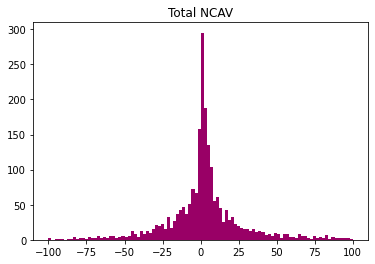

<Figure size 864x648 with 0 Axes>

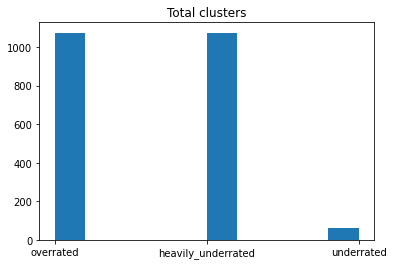

<Figure size 864x648 with 0 Axes>

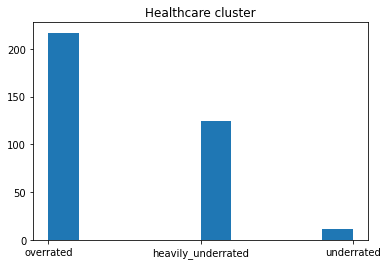

<Figure size 864x648 with 0 Axes>

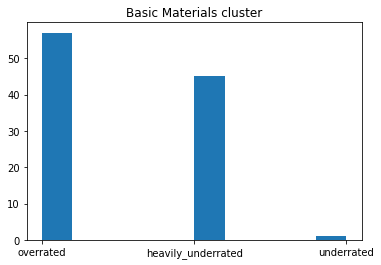

<Figure size 864x648 with 0 Axes>

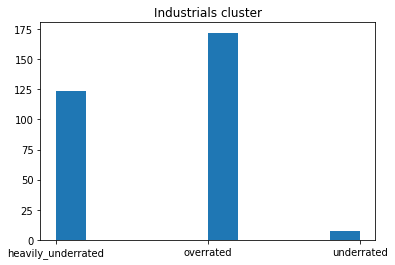

<Figure size 864x648 with 0 Axes>

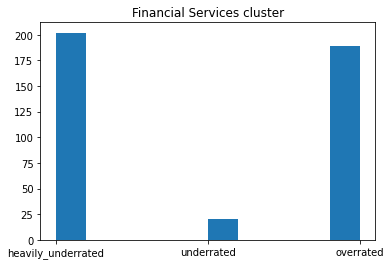

<Figure size 864x648 with 0 Axes>

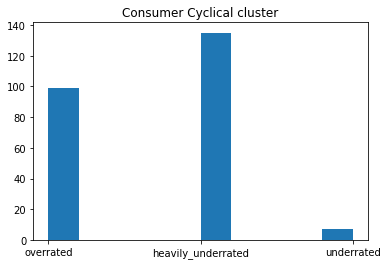

<Figure size 864x648 with 0 Axes>

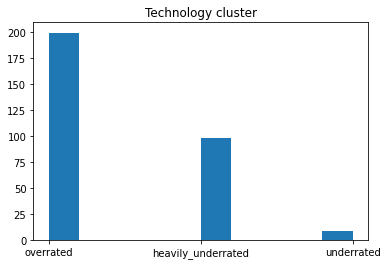

<Figure size 864x648 with 0 Axes>

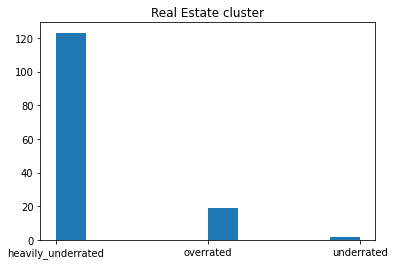

<Figure size 864x648 with 0 Axes>

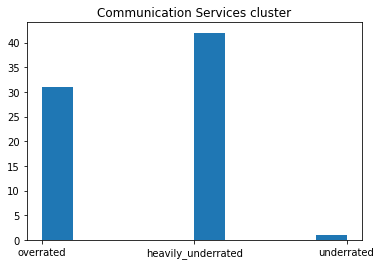

<Figure size 864x648 with 0 Axes>

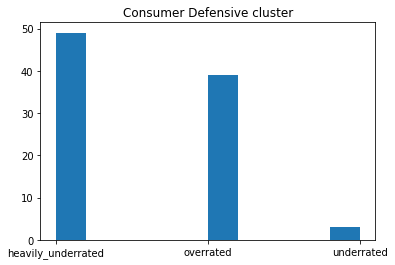

<Figure size 864x648 with 0 Axes>

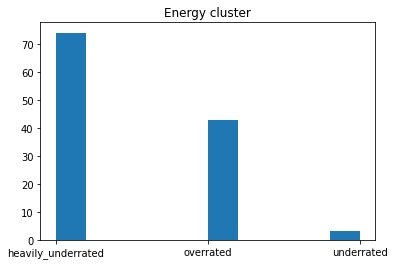

<Figure size 864x648 with 0 Axes>

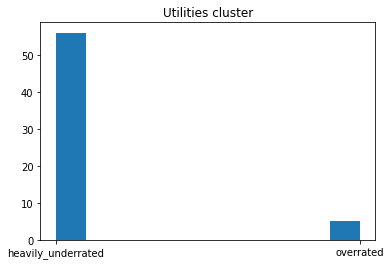

<Figure size 864x648 with 0 Axes>

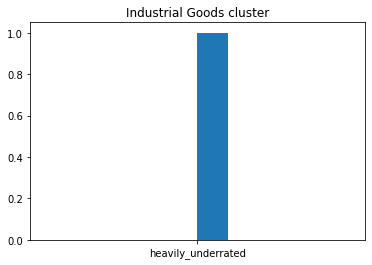

<Figure size 864x648 with 0 Axes>

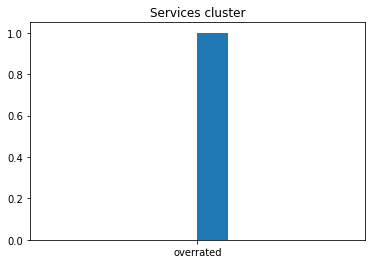

<Figure size 864x648 with 0 Axes>

Underrated companies:
13                                  Ameris Bancorp
35                      Ac Moore Arts & Crafts Inc
68      American Equity Investment Life Holding Co
76               Addvantage Technologies Group Inc
91                      Apria Healthcare Group Inc
97                  Allied Healthcare Products Inc
99                American International Group Inc
239                          Arrow Electronics Inc
295                             CNB Financial Corp
324                           C & F Financial Corp
453                 Cumberland Pharmaceuticals Inc
477                      Creditriskmonitor Com Inc
543                         Abraxas Petroleum Corp
547                                     Amrep Corp
567                                Blockbuster Inc
663                           Bridgford Foods Corp
666                 Bio Reference Laboratories Inc
667                        Barnwell Industries Inc
694                           Beazer Homes USA Inc
703      

In [ ]:
total = plt.subplot()
plt.figure(figsize=(12, 9))
total.hist(data['NCAV'], bins=100, range=(-100, 100), color=(0.6, 0.0, 0.4))
total.set_title('Total NCAV')
plt.show()

show_clusters(data, "Total clusters")
for u in data.sector.unique():
    data_sector = data.loc[data.sector == u]
    show_clusters(data_sector, u + " cluster")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#print(data)
print("Underrated companies:")
print(data.loc[data["cluster"] == "underrated"]["Name"])

In [34]:
cluster1 = data[data["cluster"] == "overrated"]
cluster2 = data[data["cluster"] == "heavily_underrated"]
cluster3 = data[data["cluster"] == "underrated"]

In [33]:
cluster1

,NCAV,Name,P/E,Ticker,currentPrice,earnings,floatShares,marketCap,revenue,sector,totalCurrentAssets,totalDebt,ration,cluster
0,2.999204,Agilent Technologies Inc,32.259876,A,130.55,1210000000,298079080.0,3.903445e+10,6319000000,Healthcare,3.799000e+09,2.905000e+09,4352.821153,overrated
1,17.457624,Alcoa Inc,27.731841,AA,64.50,429000000,183530132.0,1.189696e+10,12152000000,Basic Materials,5.026000e+09,1.822000e+09,369.466090,overrated
4,18.440591,Aarons Inc,5.259944,AAN,18.83,109934000,30204563.0,5.782467e+08,1845504000,Consumer Cyclical,8.749740e+08,3.179840e+08,102.111693,overrated
5,1.509531,Applied Optoelectronics Inc,-1.147977,AAOI,2.25,-54162000,26620188.0,6.217672e+07,211565000,Technology,1.940790e+08,1.538950e+08,149.052944,overrated
6,3.233840,Aaon Inc,47.969833,AAON,53.11,58758000,42079076.0,2.818611e+09,534517000,Industrials,2.180800e+08,8.200300e+07,1642.319956,overrated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1.093527,Provident Financial Holdings Inc,14.686796,PROV,14.90,7561000,5907489.0,1.110469e+08,35920000,Financial Services,8.646000e+07,8.000000e+07,1362.563252,overrated
2200,24.337083,Prothena Corp PLC,19.611486,PRTA,28.19,66975000,23523074.0,1.313479e+09,200577000,Healthcare,5.848090e+08,1.232600e+07,115.831467,overrated
2202,2.769951,US Auto Parts Network Inc,-260.167149,PRTS,7.89,-1513000,44120999.0,3.936329e+08,443884000,Consumer Cyclical,1.686020e+08,4.638900e+07,284.842596,overrated
2204,2.116928,Powder River Basin Gas Corp,-2.259584,PRVB,4.08,-114432000,47418246.0,2.585688e+08,1395000,Healthcare,1.010960e+08,7.150000e+05,192.732134,overrated


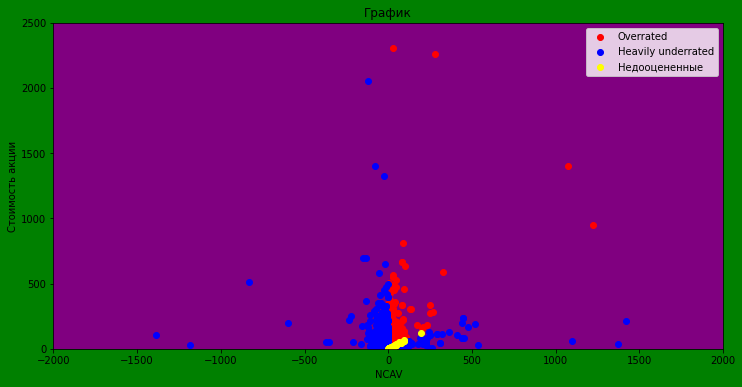

In [70]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
filtered_label1 = cluster1['NCAV']
filtered_label2 = cluster1["currentPrice"]
plt.scatter(filtered_label1, filtered_label2,  color = 'red')
filtered_label1 = cluster2['NCAV']
filtered_label2 = cluster2["currentPrice"]
plt.scatter(filtered_label1, filtered_label2, color = 'blue')


filtered_label1 = cluster3['NCAV']
filtered_label2 = cluster3["currentPrice"]
plt.scatter(filtered_label1, filtered_label2, color = 'yellow')

plt.legend(["Overrated", "Heavily underrated", "Недооцененные"])
plt.title("График")
ax.set_xlim([-2000, 2000])
ax.set_ylim([0, 2500])
ax.set_facecolor('purple')
fig.set_facecolor('green')
plt.ylabel("Стоимость акции")
plt.xlabel("NCAV")
plt.show()
print()
 


In [73]:
data.sort_values('currentPrice').tail(10)


,NCAV,Name,P/E,Ticker,currentPrice,earnings,floatShares,marketCap,revenue,sector,totalCurrentAssets,totalDebt,ration,cluster
1035,-151.487667,First Citizens Bancshares Inc,12.285856,FCNCA,693.83,547459000,12183038.0,6.726002e+09,1935171000,Financial Services,1.446420e+09,3.292000e+09,-458.010883,heavily_underrated
1701,90.400361,Mercadolibre Inc,491.506429,MELI,811.44,83304000,46375378.0,4.094445e+10,7069409000,Consumer Cyclical,8.174979e+09,3.982628e+09,897.607037,overrated
1083,1220.811107,Farmers & Merchants Bancorp,11.284144,FMCB,947.95,66336000,589762.0,7.485450e+08,180082000,Financial Services,7.344310e+08,1.444300e+07,77.649195,overrated
1806,-26.998093,Mettler Toledo International Inc,39.124133,MTD,1326.52,768985000.0,22325131.0,3.008587e+10,3717930000.0,Healthcare,1.269358e+09,1.872094e+09,-4913.384157,heavily_underrated
387,-78.285705,Chipotle Mexican Grill Inc,60.426670,CMG,1402.42,652984000.0,27758043.0,3.945765e+10,7547061000.0,Consumer Cyclical,1.381564e+09,3.554622e+09,-1791.412633,heavily_underrated
1733,1075.177223,Markel Corp,7.912948,MKL,1403.91,2425003000,13306185.0,1.918892e+10,12846425000,Financial Services,1.873520e+10,4.428692e+09,130.574753,overrated
551,-118.064036,Autozone Inc,18.539396,AZO,2055.39,2170314000,19495151.0,4.023631e+10,14629585000,Consumer Cyclical,6.415303e+09,8.716979e+09,-1740.911185,heavily_underrated
1202,277.859360,Google Inc,19.693368,GOOG,2255.98,76033000000,574178968.0,1.497346e+12,257637000000,Communication Services,1.881430e+11,2.860200e+10,811.914344,overrated
184,31.253810,Amazon Com Inc,35.114092,AMZN,2302.93,33364000000,457960351.0,1.171547e+12,469822000000,Consumer Cyclical,1.615800e+11,1.472670e+11,7368.477622,overrated
1963,1043.006225,NVR Inc,11.884232,NVR,4467.76,1236719000.0,3201700.0,1.469746e+10,8966309000.0,Consumer Cyclical,4.944453e+09,1.605060e+09,428.354107,overrated


In [74]:
data.sort_values('NCAV').head(10)

,NCAV,Name,P/E,Ticker,currentPrice,earnings,floatShares,marketCap,revenue,sector,totalCurrentAssets,totalDebt,ration,cluster
84,-1386.452224,Federal Agricultural Mortgage Corp,8.423000,AGM,103.75,132260000,9803058.0,1.114026e+09,238008000,Financial Services,1.044921e+10,2.404069e+10,-7.483128,heavily_underrated
1986,-1184.233931,Ocwen Financial Corp,13.519095,OCN,26.42,18078000.0,7413258.0,2.443982e+08,1050099000.0,Financial Services,2.204634e+09,1.098367e+10,-2.230978,heavily_underrated
348,-829.250716,Charter Communications Inc,20.981937,CHTR,509.94,4654000000.0,110860324.0,9.764993e+10,51682000000.0,Communication Services,3.566000e+09,9.549700e+10,-61.494068,heavily_underrated
259,-598.430150,Avis Budget Group Inc,7.552359,CAR,200.98,1285000000.0,28960774.0,9.704782e+09,9313000000.0,Industrials,1.936000e+09,1.926700e+10,-33.584538,heavily_underrated
464,-370.850786,Cheniere Energy Partners LP,16.397494,CQP,55.22,1630000000.0,40614716.0,2.672792e+10,9434000000.0,Energy,2.212000e+09,1.727400e+10,-14.890086,heavily_underrated
72,-351.752893,Aercap Holdings NV,12.029232,AER,49.00,1000507000,121620496.0,1.203533e+10,4588930000,Industrials,6.322839e+09,4.910320e+10,-13.930234,heavily_underrated
1802,-232.401947,Microstrategy Inc,-4.628667,MSTR,219.39,-535480000.0,9328046.0,2.478558e+09,510762000.0,Technology,2.679650e+08,2.435821e+09,-94.401102,heavily_underrated
140,-223.412018,Alexanders Inc,9.545288,ALX,248.44,132930000,2122079.0,1.268855e+09,206148000,Real Estate,6.328920e+08,1.106990e+09,-111.202612,heavily_underrated
1419,-211.148426,Intergroup Corp,10.460361,INTG,49.51,10409000.0,695667.0,1.088819e+08,28658000.0,Consumer Cyclical,5.207600e+07,1.989650e+08,-23.447961,heavily_underrated
113,-161.372238,Air Lease Corp,9.961385,AL,38.07,436632000,103413104.0,4.349459e+09,2088389000,Industrials,1.136721e+09,1.782472e+10,-23.591419,heavily_underrated
